In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('../Datasets/cleaned_dataframe_houston.csv')

In [4]:
df.head()

,id,name,categories,latitude,longitude,review_count,rating,price,zip_code,city,...,is_closed,url,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7,address
0,--4m48NzUAHvTd4v0u5YIg,Christian's Tailgate Bar and Grill,sportsbars,29.752573,-95.376317,353.0,3.0,$$,77002.0,Houston,...,False,https://www.yelp.com/biz/christians-tailgate-b...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2000 Bagby St
1,--4uMhyYMhURrd3dgwe_mA,Tu-Go Kitchen,foodtrucks,29.710531,-95.381760,7.0,2.0,$$,77021,Houston,...,False,https://www.yelp.com/biz/tu-go-kitchen-houston...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1 Hermann Park Ct
2,--tU4l_I9bKvJAeKYPbdSw,Treebeards,southern,29.755270,-95.363040,32.0,4.0,$,77010.0,Houston,...,False,https://www.yelp.com/biz/treebeards-houston-3?...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200 McKinney St Ste 329
3,-07hPjEFeAZVe7XSHIz54A,Hollywood Sign Hike,hiking,34.120281,-118.316141,178.0,4.5,NaN,90068,Los Angeles,...,False,https://www.yelp.com/biz/hollywood-sign-hike-l...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3200 Canyon Dr Bronson Canyon Griffith Park
4,-1hWNeXT09Sjwbref49wrg,Chase Bank,banks,29.829029,-95.429360,6.0,2.5,NaN,77018.0,Houston,...,False,https://www.yelp.com/biz/chase-bank-houston-17...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4320 Ella Blvd


In [5]:
df.columns

Index(['id', 'name', 'categories', 'latitude', 'longitude', 'review_count',
       'rating', 'price', 'zip_code', 'city', 'state', 'country',
       'display_address', 'display_phone', 'alias', 'is_closed', 'url',
       'lifeline_1', 'lifeline_2', 'lifeline_3', 'lifeline_4', 'lifeline_5',
       'lifeline_6', 'lifeline_7', 'address'],
      dtype='object')

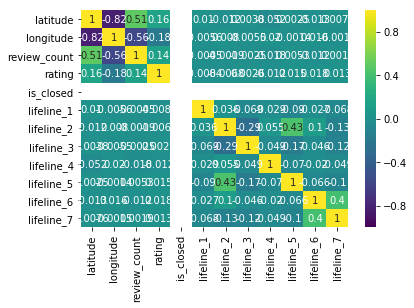

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)

In [7]:
df[['latitude','longitude']].describe()

,latitude,longitude
count,7157.000000,7157.000000
mean,30.384231,-98.560688
std,1.776526,8.515620
min,-31.422655,-118.459931
25%,29.718930,-95.464670
50%,29.750271,-95.410980
75%,29.810863,-95.375641
max,55.867643,120.066340


In [8]:
#!pip install geopandas

In [9]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [10]:
houston_map = gpd.read_file('../Datasets/Houston_City_Limit/Houston_City_Limit.shp')

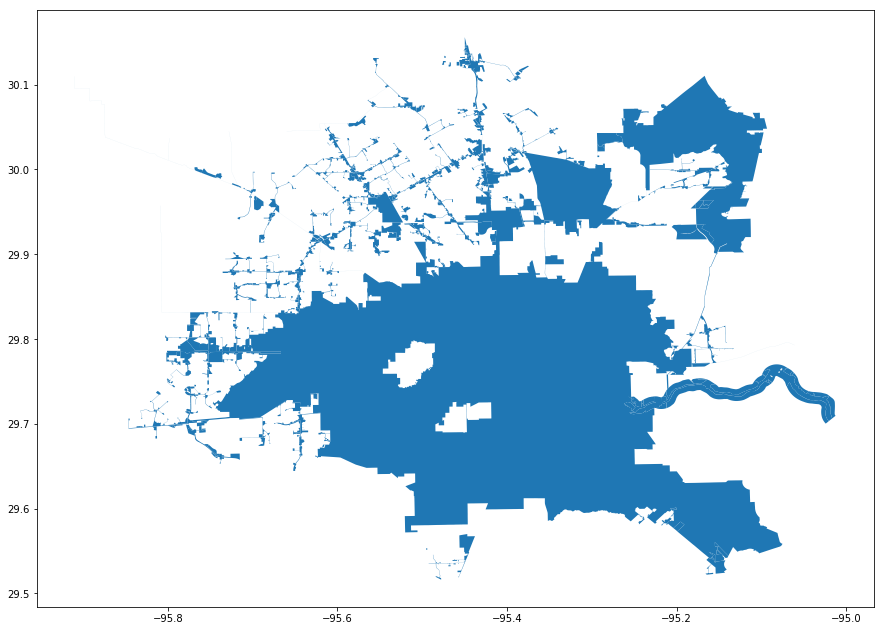

In [11]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax)

In [12]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]

In [13]:
crs = {'init': 'epsg:4326'}

In [14]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

,id,name,categories,latitude,longitude,review_count,rating,price,zip_code,city,...,url,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7,address,geometry
0,--4m48NzUAHvTd4v0u5YIg,Christian's Tailgate Bar and Grill,sportsbars,29.752573,-95.376317,353.0,3.0,$$,77002.0,Houston,...,https://www.yelp.com/biz/christians-tailgate-b...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2000 Bagby St,POINT (-95.376317416484 29.752572734781)
1,--4uMhyYMhURrd3dgwe_mA,Tu-Go Kitchen,foodtrucks,29.710531,-95.381760,7.0,2.0,$$,77021,Houston,...,https://www.yelp.com/biz/tu-go-kitchen-houston...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1 Hermann Park Ct,POINT (-95.3817596435547 29.7105312347412)
2,--tU4l_I9bKvJAeKYPbdSw,Treebeards,southern,29.755270,-95.363040,32.0,4.0,$,77010.0,Houston,...,https://www.yelp.com/biz/treebeards-houston-3?...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1200 McKinney St Ste 329,POINT (-95.36304 29.75527)
3,-07hPjEFeAZVe7XSHIz54A,Hollywood Sign Hike,hiking,34.120281,-118.316141,178.0,4.5,NaN,90068,Los Angeles,...,https://www.yelp.com/biz/hollywood-sign-hike-l...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3200 Canyon Dr Bronson Canyon Griffith Park,POINT (-118.3161413 34.1202807)
4,-1hWNeXT09Sjwbref49wrg,Chase Bank,banks,29.829029,-95.429360,6.0,2.5,NaN,77018.0,Houston,...,https://www.yelp.com/biz/chase-bank-houston-17...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4320 Ella Blvd,POINT (-95.42936 29.829029)


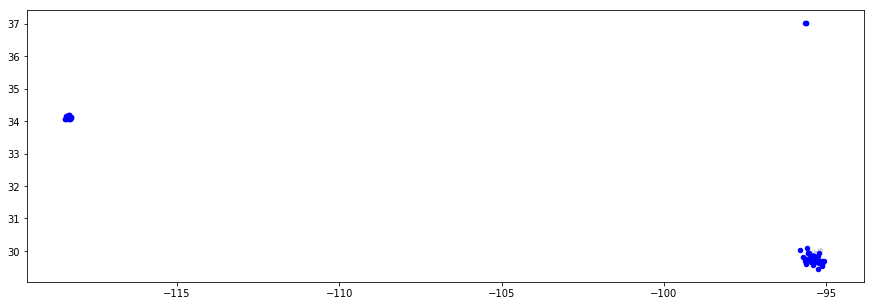

In [15]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['lifeline_1'] == 1.0].plot(ax = ax, markersize=20, color='blue', label='L1')

In [16]:
geo_df.shape

(7157, 26)

In [17]:
geo_df2 = geo_df[geo_df['state'] == 'TX']
geo_df2.shape

(6124, 26)

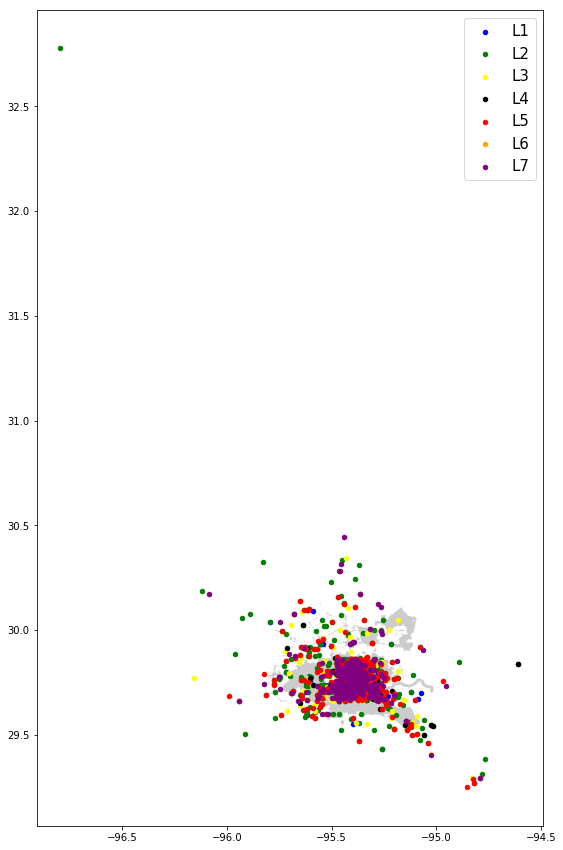

In [18]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df2[geo_df2['lifeline_1'] == 1.0].plot(ax = ax, markersize=20, color='blue', label='L1')
geo_df2[geo_df2['lifeline_2'] == 1.0].plot(ax = ax, markersize=20, color='green', label='L2')
geo_df2[geo_df2['lifeline_3'] == 1.0].plot(ax = ax, markersize=20, color='yellow', label='L3')
geo_df2[geo_df2['lifeline_4'] == 1.0].plot(ax = ax, markersize=20, color='black', label='L4')
geo_df2[geo_df2['lifeline_5'] == 1.0].plot(ax = ax, markersize=20, color='red', label='L5')
geo_df2[geo_df2['lifeline_6'] == 1.0].plot(ax = ax, markersize=20, color='orange', label='L6')
geo_df2[geo_df2['lifeline_7'] == 1.0].plot(ax = ax, markersize=20, color='purple', label='L7')
plt.legend(prop={'size':15})

In [19]:
geo_df2 = geo_df2[geo_df2['latitude'] <= 31.0]

(1) safety and security; (2) Food, water, sheltering; (3) Health and medical; (4) Energy (power, fuel); (5) Communications; (6) Transportation; (7) hazardous waste

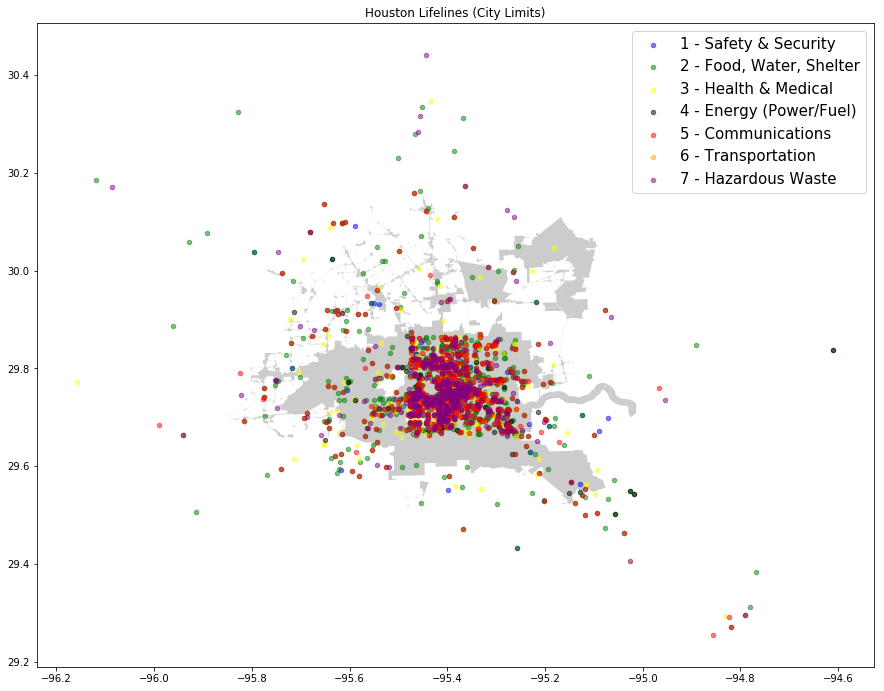

In [20]:
fig,ax = plt.subplots(figsize=(15,15))
houston_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df2[geo_df2['lifeline_1'] == 1.0].plot(ax = ax, markersize=20, color='blue',
                                           alpha = 0.5, label='1 - Safety & Security')
geo_df2[geo_df2['lifeline_2'] == 1.0].plot(ax = ax, markersize=20, color='green',
                                           alpha = 0.5, label='2 - Food, Water, Shelter')
geo_df2[geo_df2['lifeline_3'] == 1.0].plot(ax = ax, markersize=20, color='yellow',
                                           alpha = 0.5, label='3 - Health & Medical')
geo_df2[geo_df2['lifeline_4'] == 1.0].plot(ax = ax, markersize=20, color='black',
                                           alpha = 0.5, label='4 - Energy (Power/Fuel)')
geo_df2[geo_df2['lifeline_5'] == 1.0].plot(ax = ax, markersize=20, color='red',
                                           alpha = 0.5, label='5 - Communications')
geo_df2[geo_df2['lifeline_6'] == 1.0].plot(ax = ax, markersize=20, color='orange',
                                           alpha = 0.5, label='6 - Transportation')
geo_df2[geo_df2['lifeline_7'] == 1.0].plot(ax = ax, markersize=20, color='purple',
                                           alpha = 0.5, label='7 - Hazardous Waste')
plt.legend(prop={'size':15})
# plt.xlim(-95.9, -94.9)
# plt.ylim(29.4, 30.2)
plt.title('Houston Lifelines (City Limits)');

In [21]:
geo_df2['zip_code'] = geo_df2['zip_code'].map(lambda x: float(x))

In [22]:
geo_df2['zip_code'].dropna(inplace=True)

In [27]:
geo_df2['is_closed'] = geo_df2['is_closed'].map({False: 0, True: 1})

In [39]:
type(geo_df2['is_closed'])

pandas.core.series.Series

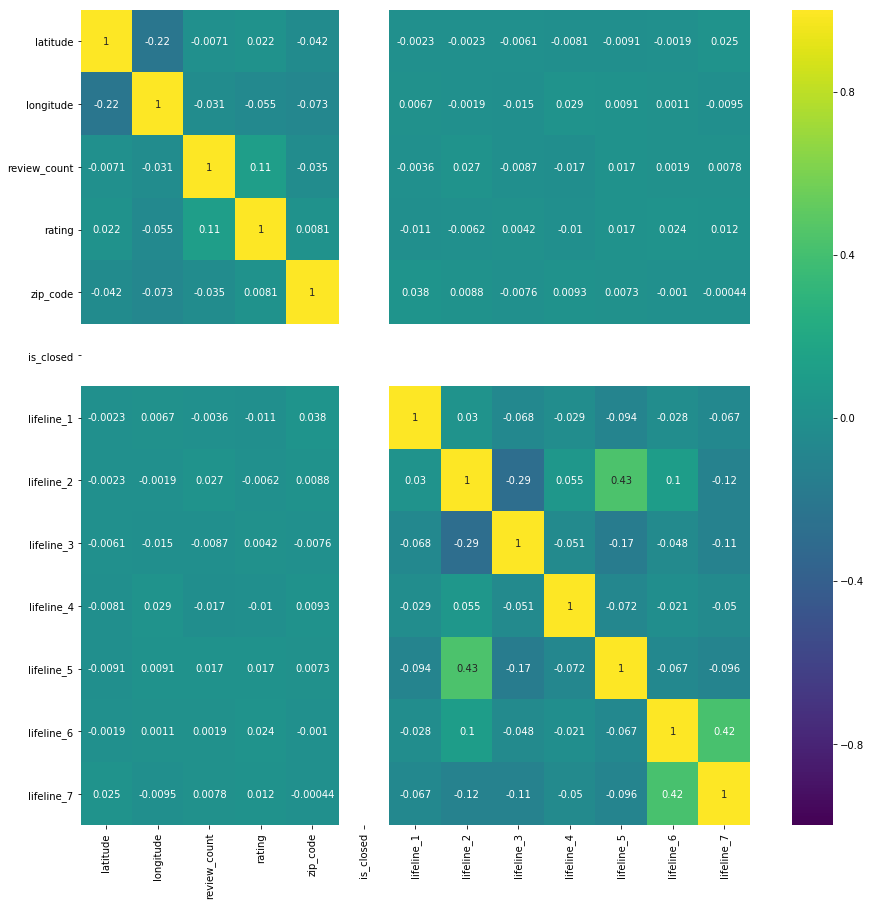

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(geo_df2.corr(), annot=True, cmap='viridis', vmin=-1, vmax=1)

In [109]:
zip_df = geo_df2[['zip_code', 'lifeline_1', 'lifeline_2', 'lifeline_3', 'lifeline_4', 'lifeline_5', 'lifeline_6', 'lifeline_7']]

In [110]:
zip_df.head()

,zip_code,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7
0,77002.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,77021.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,77010.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,77018.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,77098.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
zip_df = zip_df.set_index(zip_df['zip_code'])

In [112]:
zip_df.drop(columns='zip_code', inplace=True)

In [113]:
zip_df = zip_df.groupby('zip_code').sum()

In [114]:
zip_df['total'] = zip_df.sum(axis=1)
zip_df.head()

,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7,total
zip_code,,,,,,,,
65241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77001.0,0.0,7.0,2.0,0.0,4.0,0.0,0.0,13.0
77002.0,24.0,228.0,54.0,14.0,97.0,8.0,54.0,479.0
77003.0,0.0,42.0,6.0,0.0,25.0,2.0,13.0,88.0
77004.0,10.0,99.0,27.0,6.0,50.0,5.0,25.0,222.0


In [115]:
columns = ['lifeline_1', 'lifeline_2', 'lifeline_3', 'lifeline_4', 'lifeline_5', 'lifeline_6', 'lifeline_7']
for col in columns:
    zip_df[col] = zip_df[col] / zip_df['total']
zip_df.head()

,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7,total
zip_code,,,,,,,,
65241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77001.0,0.000000,0.538462,0.153846,0.000000,0.307692,0.000000,0.000000,13.0
77002.0,0.050104,0.475992,0.112735,0.029228,0.202505,0.016701,0.112735,479.0
77003.0,0.000000,0.477273,0.068182,0.000000,0.284091,0.022727,0.147727,88.0
77004.0,0.045045,0.445946,0.121622,0.027027,0.225225,0.022523,0.112613,222.0


In [128]:
zip_prop = zip_df.drop(columns='total')

In [131]:
zip_prop.dropna(inplace=True)

In [133]:
zip_df.sort_values('total')

,lifeline_1,lifeline_2,lifeline_3,lifeline_4,lifeline_5,lifeline_6,lifeline_7,total
zip_code,,,,,,,,
65241.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77316.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
77515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [145]:
zip_prop.drop(index=85016.0, inplace=True)

In [151]:
zip_prop.reset_index(inplace=True)

<BarContainer object of 172 artists>

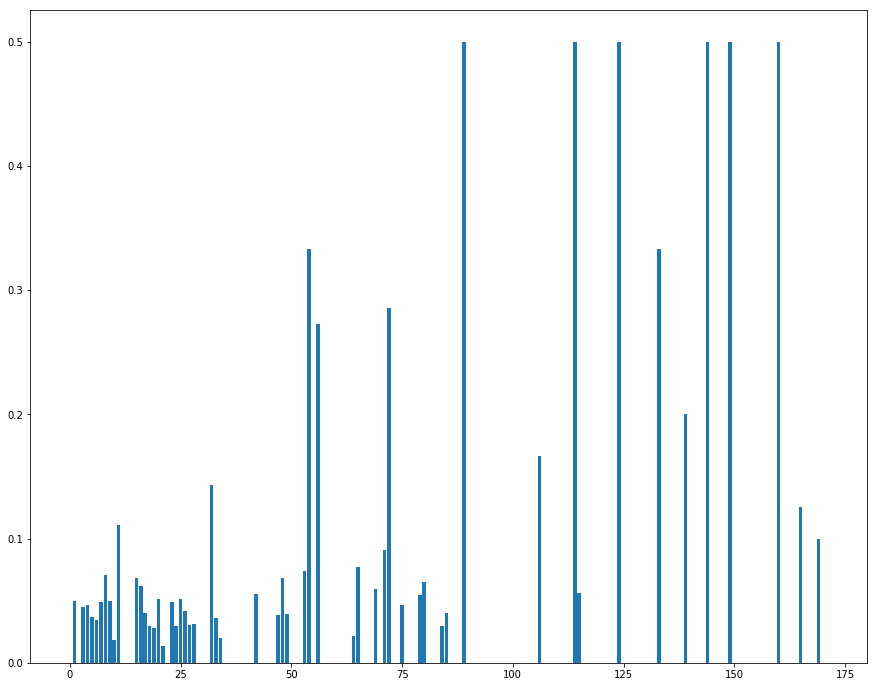

In [154]:
plt.figure(figsize=(15,12))
plt.bar(zip_prop.index, zip_prop['lifeline_1'])